In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Problem 1B

In [45]:
# given data
x_ace_percent = [3.3, 7.2, 11.7, 17.1, 20.0]
P_ace = [3.77, 14.9, 42.9, 87.1, 114.4] # torr
P_tot_kpa = 101 # kPa

x_ace = [x/100 for x in x_ace_percent]
P_tot = P_tot_kpa * 1000 * 0.0075 # torr
y_ace = (pressure / P_tot for pressure in P_ace)

In [46]:
X = [x/(1-x) for x in x_ace]
Y = [y/(1-y) for y in y_ace]

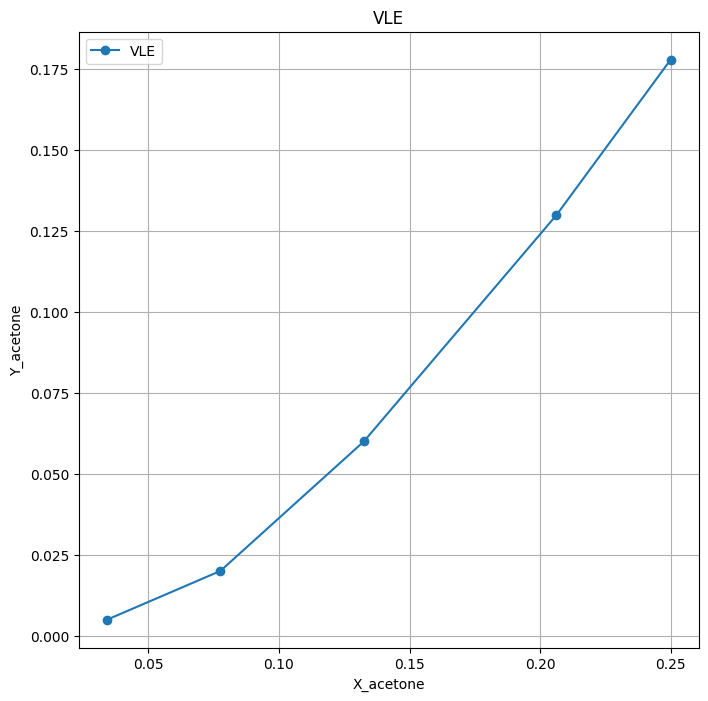

In [47]:
plt.figure(figsize=(8,8))
plt.plot(X, Y, label="VLE", marker="o")
plt.xlabel("X_acetone")
plt.ylabel("Y_acetone")
plt.title("VLE")
plt.legend()
plt.grid(True)

In [48]:
# find operating line

Y_n_1 = 0.176
Y_1 = 0.009
X_0 = 0


Intersection point: X = 0.2455975354373594, Y = 0.17305915367215607


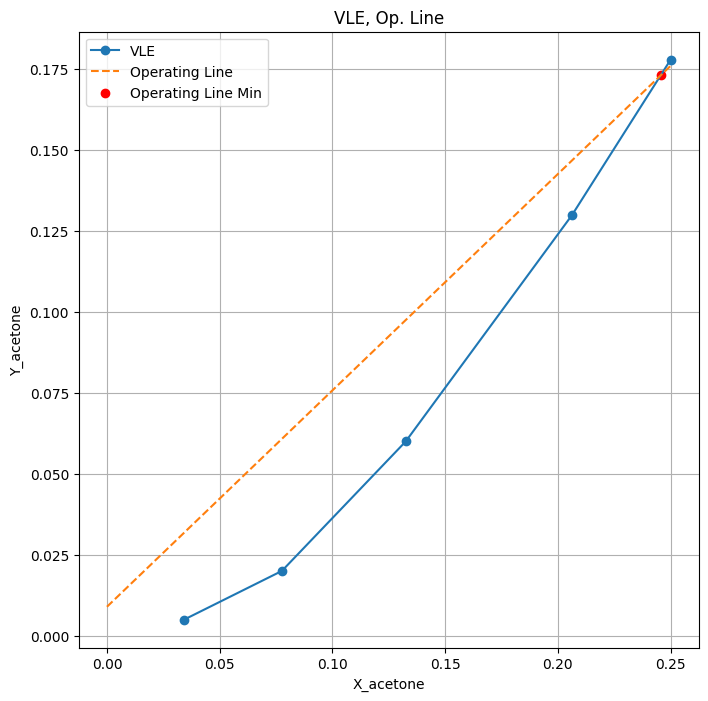

In [49]:
Y_n_1 = 0.176
Y_1 = 0.009
m = (Y_n_1 - Y_1) / max(X)
b = Y_1

def operating_line(X):
    return m * X + b

def find_intersection(X_data, Y_data):
    data_line = interp1d(X_data, Y_data, kind='linear', fill_value="extrapolate")

    def difference(X):
        return operating_line(X) - data_line(X)

    X_intersection = fsolve(difference, 0.5)[0]
    Y_intersection = operating_line(X_intersection)
    return X_intersection, Y_intersection

X_intersect, Y_intersect = find_intersection(X, Y)
print(f"Intersection point: X = {X_intersect}, Y = {Y_intersect}")

plt.figure(figsize=(8, 8))
plt.plot(X, Y, label="VLE", marker="o")
plt.plot([0, max(X)], [operating_line(0), operating_line(max(X))], label="Operating Line", linestyle="--")
plt.scatter([X_intersect], [Y_intersect], color='red', label="Operating Line Min")
plt.title("VLE, Op. Line")
plt.xlabel("X_acetone")
plt.ylabel("Y_acetone")
plt.legend()
plt.grid()


In [50]:
X_n = 0.2455975354373594
op_line = (Y_n_1 - Y_1) / (X_n)

print(op_line)

0.6799742501593383


# Problem 1C

In [51]:
op_line = op_line * 1.25

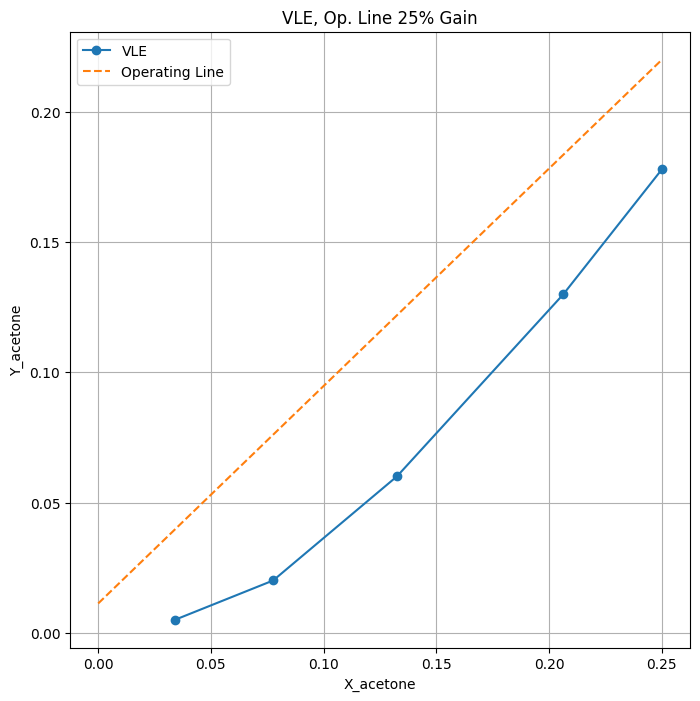

In [52]:
plt.figure(figsize=(8, 8))
plt.plot(X, Y, label="VLE", marker="o")
plt.plot([0, max(X)], [1.25*operating_line(0), 1.25*operating_line(max(X))], label="Operating Line", linestyle="--")
plt.title(f"VLE, Op. Line 25% Gain")
plt.xlabel("X_acetone")
plt.ylabel("Y_acetone")
plt.legend()
plt.grid()

# Problem 1E

In [53]:
import math

def calculate_N(phi_A, A_e):
    return (math.log((A_e - 1 + phi_A) / phi_A) / math.log(A_e)) - 1

phi_A = 0.05
A_e = 1.4
calculate_N(phi_A, A_e)


5.530180912993923

# Bonus

In [57]:

D_A = 1.0e-6  #cm^2/s
radius = 0.1  # cm
C_surface = 0.02  # gmole/cm³
time_total = 1.39 * 3600  # s
n_points = 100
n_steps = 1000

dr = radius / (n_points - 1)
dt = time_total / n_steps
r = np.linspace(0, radius, n_points)

alpha = D_A * dt / dr**2

C = np.zeros(n_points)  
C[-1] = C_surface

for step in range(n_steps):
    C_new = np.copy(C)
    
    for i in range(1, n_points - 1):
        d2C_dr2 = (C[i+1] - 2*C[i] + C[i-1]) / dr**2
        dC_dr = (C[i+1] - C[i-1]) / (2 * dr)
        C_new[i] = C[i] + D_A * dt * (d2C_dr2 + (2 / r[i]) * dC_dr)

    C_new[-1] = C_surface
    C = np.copy(C_new)

C_center = C[0]
print("Concentration at center of gel particle after 1.39 hours:", C_center, "gmole/cm³")



Concentration at center of gel particle after 1.39 hours: 0.0 gmole/cm³


/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_14032/3240021606.py:21: RuntimeWarning: overflow encountered in scalar divide
  d2C_dr2 = (C[i+1] - 2*C[i] + C[i-1]) / dr**2
/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_14032/3240021606.py:23: RuntimeWarning: invalid value encountered in scalar add
  C_new[i] = C[i] + D_A * dt * (d2C_dr2 + (2 / r[i]) * dC_dr)
/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_14032/3240021606.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  dC_dr = (C[i+1] - C[i-1]) / (2 * dr)
/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_14032/3240021606.py:23: RuntimeWarning: overflow encountered in scalar multiply
  C_new[i] = C[i] + D_A * dt * (d2C_dr2 + (2 / r[i]) * dC_dr)
